In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
# add the proxpython directory into the Python's path
sys.path.append("./ProxPython")



from MRI_exp import MRI_Experiment



Loading MRI Shepp-Logan data
Running RAAR on MRI SENSE...


<IPython.core.display.Javascript object>


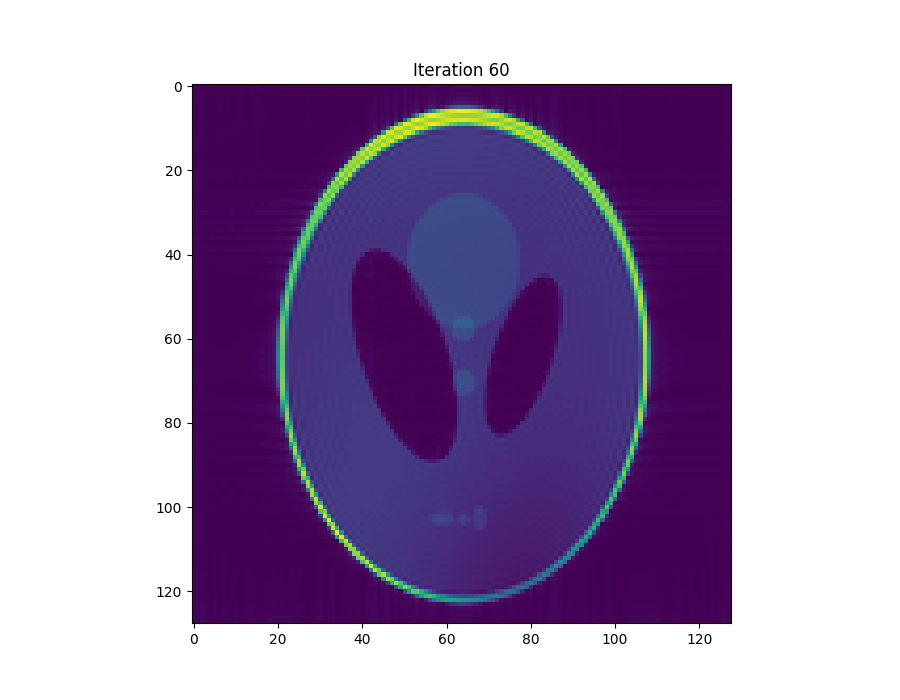

Took 60 iterations and 8.596582651138306 seconds.


In [2]:
MAXIT=60
dataname='phantom'
#dataname='smallfov'
lambda_=0.85
MRI_RAAR = MRI_Experiment(algorithm='RAAR', MAXIT=MAXIT, anim=True, anim_step=1,
                          dataname=dataname, lambda_0=lambda_, lambda_max=lambda_,)
MRI_RAAR.run()


<IPython.core.display.Javascript object>


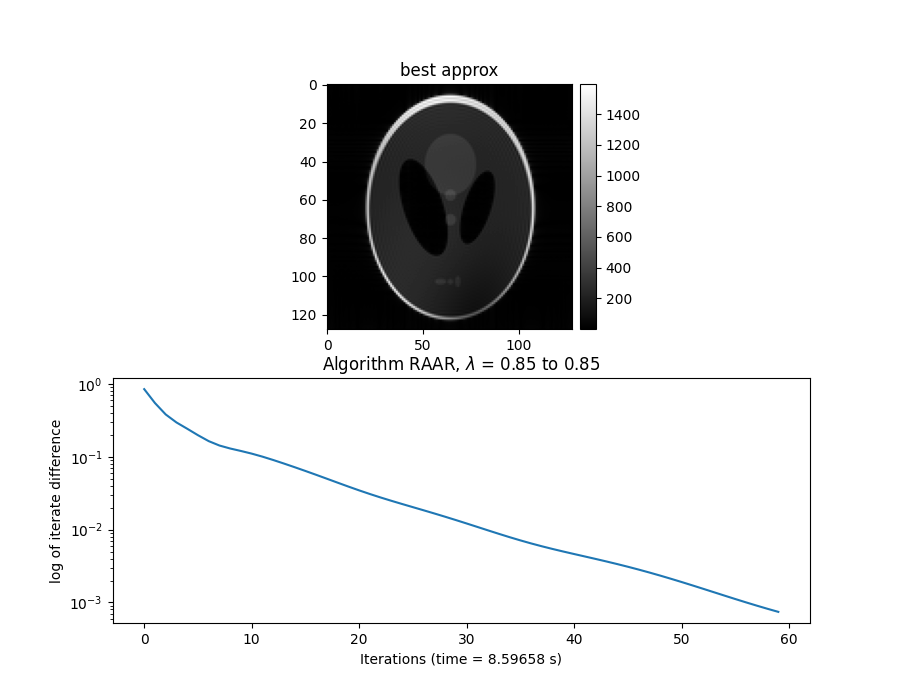

In [3]:
MRI_RAAR.show()

Loading MRI Shepp-Logan data
Running AP on MRI SENSE...


<IPython.core.display.Javascript object>


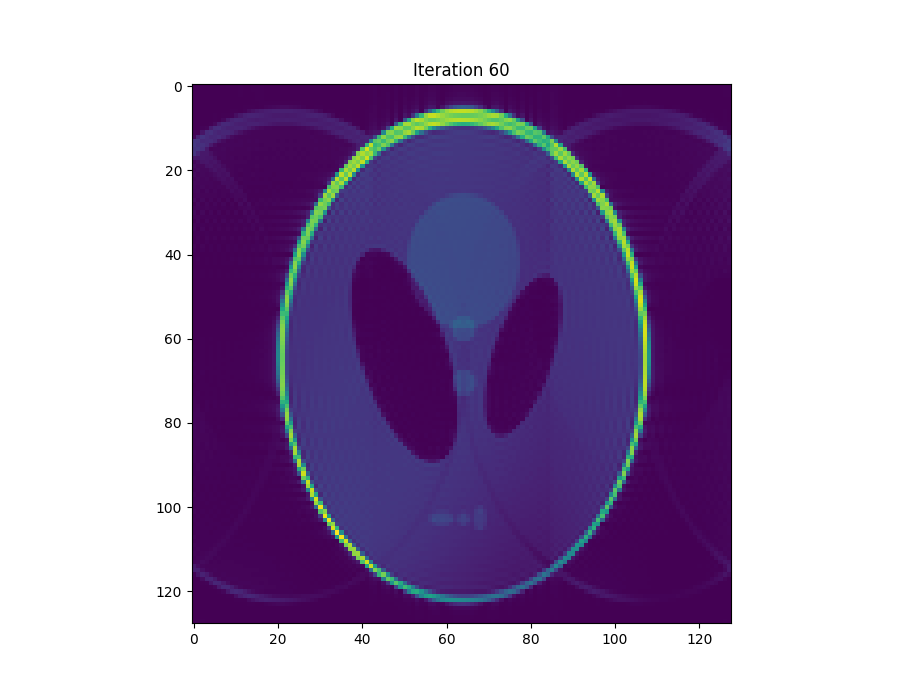

Took 60 iterations and 7.828580141067505 seconds.


In [4]:
MRI_AP = MRI_Experiment(algorithm='AP', MAXIT=MAXIT, anim=True, anim_step=1,
                        dataname=dataname, lambda_0=0.5, lambda_max=0.5,)
MRI_AP.run()


<IPython.core.display.Javascript object>


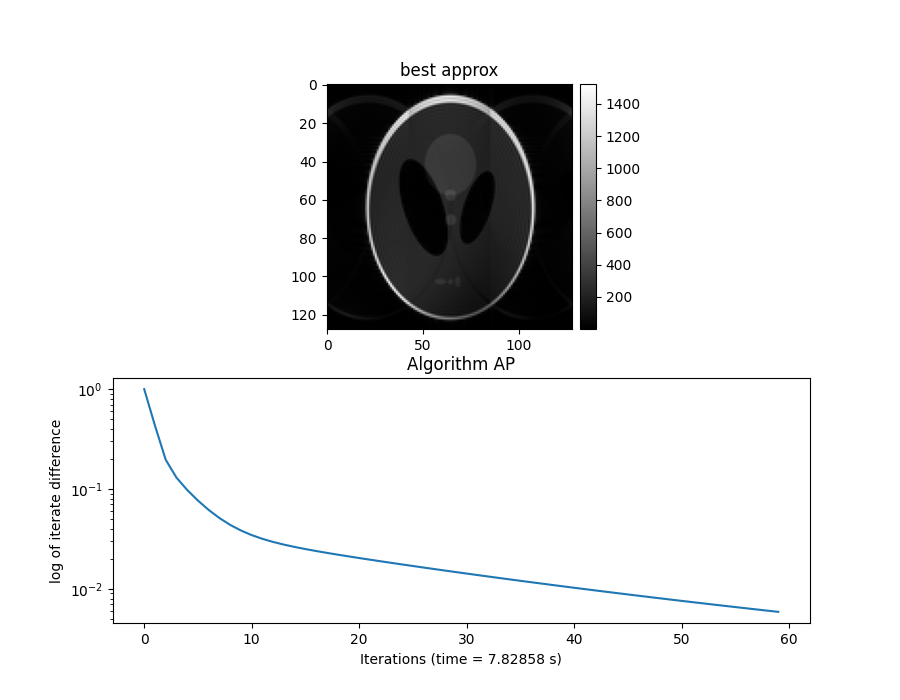

In [5]:
MRI_AP.show()

In [6]:
diff = np.abs(MRI_RAAR.solution - MRI_AP.solution).squeeze()
nrmse = np.sum(np.abs(diff)**2)/np.sum(np.abs(MRI_RAAR.solution)**2)
print('NRMSE: ', nrmse)


NRMSE:  0.01449826722696804


<IPython.core.display.Javascript object>


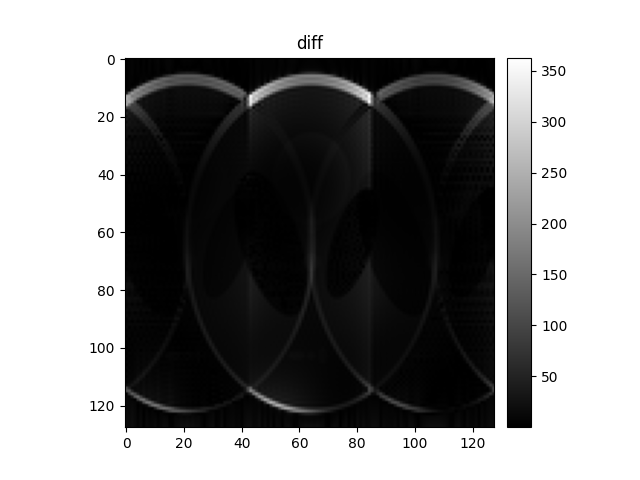

In [7]:
f, ax = plt.subplots(1,1)
MRI_RAAR.createImageSubFigure(f, ax, diff, "diff")
plt.show()